<a href="https://colab.research.google.com/github/fikhan/BlockChain_NFTMarketPlace/blob/main/linearregressionexample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression Health Costs Calculator
Note
Damn, I hate this problem! I feel so stupid to keep tweaking the numbers and model layers until I get the expected result. Even so, it doesn't always work. This is why I don't go with Data Science although in love Math. In Math, we're able to prove the correctness. In Data Science, we (or is it just me) keep repeating the same method and hope for a better result. When it works, God know why (I don't believe in God, btw).

Total time for this: 2h.

Problem description
Copied and modfied from this Google Colab link

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.

pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.

Create a model and train it with the train_dataset. Run the final cell in this notebook to check your model. The final cell will use the unseen test_dataset to check how well the model generalizes.

To pass the challenge, model.evaluate must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the test_dataset and graph the results.

Solution
Download data

In [1]:
!wget -N https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv

--2023-10-31 18:52:26--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2023-10-31 18:52:26 (4.52 MB/s) - ‘insurance.csv’ saved [50264/50264]



Install tensorflow docs

In [2]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Prepare Dataset

In [4]:
dataset = pd.read_csv('insurance.csv')
len(dataset)

1338

In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Since the data has some text columns, we need to convert the text values to numeric.

In [6]:
df = dataset
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]
dataset = df
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,0,0,16884.92
1,18,1,33.8,1,1,1,1725.55
2,28,1,33.0,3,1,1,4449.46
3,33,1,22.7,0,1,2,21984.47
4,32,1,28.9,0,1,2,3866.86


Let's pick randomly 20% record to make our test_dataset first

In [7]:
test_dataset = dataset.sample(frac=0.2)
len(test_dataset)

268

Now, we select the remaining 80% to make train_dataset

In [8]:
train_dataset = dataset[~dataset.isin(test_dataset)].dropna()
len(train_dataset)

1070

In [9]:
train_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19.0,0.0,27.9,0.0,0.0,0.0,16884.92
2,28.0,1.0,33.0,3.0,1.0,1.0,4449.46
3,33.0,1.0,22.7,0.0,1.0,2.0,21984.47
4,32.0,1.0,28.9,0.0,1.0,2.0,3866.86
5,31.0,0.0,25.7,0.0,1.0,1.0,3756.62


Prepare the labels

In [10]:
train_labels = train_dataset.pop("expenses")
train_labels.head()

0    16884.92
2     4449.46
3    21984.47
4     3866.86
5     3756.62
Name: expenses, dtype: float64

In [11]:
train_dataset.head()

,age,sex,bmi,children,smoker,region
0,19.0,0.0,27.9,0.0,0.0,0.0
2,28.0,1.0,33.0,3.0,1.0,1.0
3,33.0,1.0,22.7,0.0,1.0,2.0
4,32.0,1.0,28.9,0.0,1.0,2.0
5,31.0,0.0,25.7,0.0,1.0,1.0


In [12]:
test_labels = test_dataset.pop("expenses")
test_labels.head()

662      5148.55
605      9283.56
510     11763.00
1259    10197.77
348      5478.04
Name: expenses, dtype: float64

In [13]:
test_dataset.head()

,age,sex,bmi,children,smoker,region
662,32,0,31.5,1,1,3
605,51,0,34.1,0,1,1
510,56,1,32.1,1,1,3
1259,52,0,23.2,0,1,3
348,36,0,29.9,1,1,1


Prepare the model

In [14]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(4),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [15]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 198 (796.00 Byte)
Trainable params: 185 (740.00 Byte)
Non-trainable params: 13 (56.00 Byte)
________________

In [16]:
history = model.fit(
    train_dataset,
    train_labels,
    epochs=100,
    validation_split=0.5,
    verbose=0, # disable logging
)

print(history)

Test

9/9 - 0s - loss: 3471.0725 - mae: 3471.0725 - mse: 35882252.0000 - 25ms/epoch - 3ms/step
Testing set Mean Abs Error: 3471.07 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 1ms/step


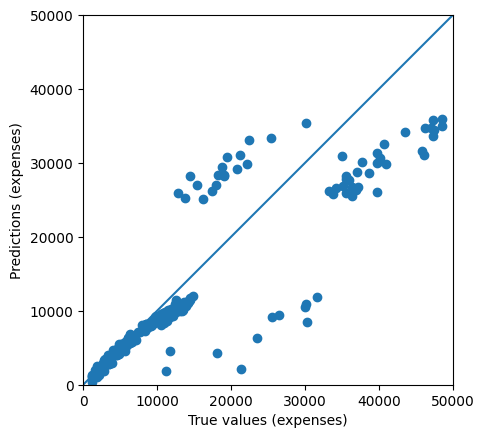

In [17]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)